# **Waste Material Segregation for Improving Waste Management**
## Ulagammal Ramalingam
## Nidhi Kumari

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [ ]:
# Import essential libraries

import os
import numpy as np
import pandas as pd
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization, Activation, AveragePooling2D)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam


# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Load the dataset.

In [ ]:
# Load and unzip the dataset


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/CNN_Case_study_data.zip" -d "/content/waste_data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/waste_data/data/Glass/file_96.png  
  inflating: /content/waste_data/data/Paper/file_560.png  
  inflating: /content/waste_data/data/Glass/file_620.png  
  inflating: /content/waste_data/data/Glass/file_676.png  
  inflating: /content/waste_data/data/Glass/file_177.png  
  inflating: /content/waste_data/data/Glass/file_749.png  
  inflating: /content/waste_data/data/Glass/file_460.png  
  inflating: /content/waste_data/data/Glass/file_127.png  
  inflating: /content/waste_data/data/Glass/file_438.png  
  inflating: /content/waste_data/data/Glass/file_132.png  
  inflating: /content/waste_data/data/Glass/file_98.png  
  inflating: /content/waste_data/data/Glass/file_427.png  
  inflating: /content/waste_data/data/Glass/file_351.png  
  inflating: /content/waste_data/data/Glass/file_74.png  
  inflating: /content/waste_data/data/Glass/file_377.png  
  inflating: /content/waste_data/data/Glass/file_445.png  
  inflat

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [ ]:
# Create a function to load the raw images

def load_images_and_labels(data_dir):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for label_index, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if os.path.isfile(image_path):
                try:
                    img = Image.open(image_path).convert("RGB")
                    images.append(img)  # Keep as PIL.Image
                    labels.append(class_name)
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")

    return images, labels

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

Total images loaded: 7625
Total labels loaded: 7625
Unique categories: {'Metal', 'Plastic', 'Cardboard', 'Other', 'Glass', 'Food_Waste', 'Paper'}


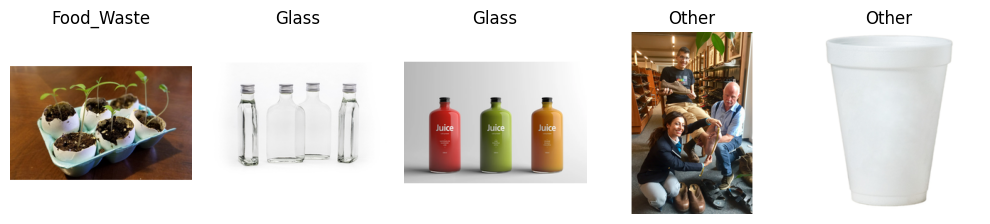

In [ ]:
# Get the images and their labels

data_dir = "/content/waste_data/data"
images, labels = load_images_and_labels(data_dir)

# Verify few samples
print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")
print(f"Unique categories: {set(labels)}")

# Display 5 random images with labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(5):
    idx = np.random.randint(0, len(images))
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[idx])
    plt.title(labels[idx])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Verify if the images and labels are loaded correctly

data_path = "/content/waste_data/data"

print("Verifying folder structure and file counts:\n" + "-"*50)

for root, dirs, files in os.walk(data_path):
    if root == data_path:
        continue  # skip the root folder itself
    folder_name = os.path.basename(root)
    print(f'Folder: {folder_name}')
    print(f'Number of images: {len([f for f in files if f.lower().endswith((".jpg", ".jpeg", ".png"))])}')
    print('-' * 40)

Verifying folder structure and file counts:
--------------------------------------------------
Folder: Paper
Number of images: 1030
----------------------------------------
Folder: Plastic
Number of images: 2295
----------------------------------------
Folder: Other
Number of images: 1010
----------------------------------------
Folder: Glass
Number of images: 750
----------------------------------------
Folder: Food_Waste
Number of images: 1000
----------------------------------------
Folder: Metal
Number of images: 1000
----------------------------------------
Folder: Cardboard
Number of images: 540
----------------------------------------


Perform any operations, if needed, on the images and labels to get them into the desired format.

In [ ]:
# Create the DataFrame from Images and Labels which would be easir
data = {'image': images, 'label': labels}
df = pd.DataFrame(data)

# Group by labels to count the number of images per label
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
label_counts

label  count
0     Plastic   2295
1       Paper   1030
2       Other   1010
3  Food_Waste   1000
4       Metal   1000
5       Glass    750
6   Cardboard    540

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

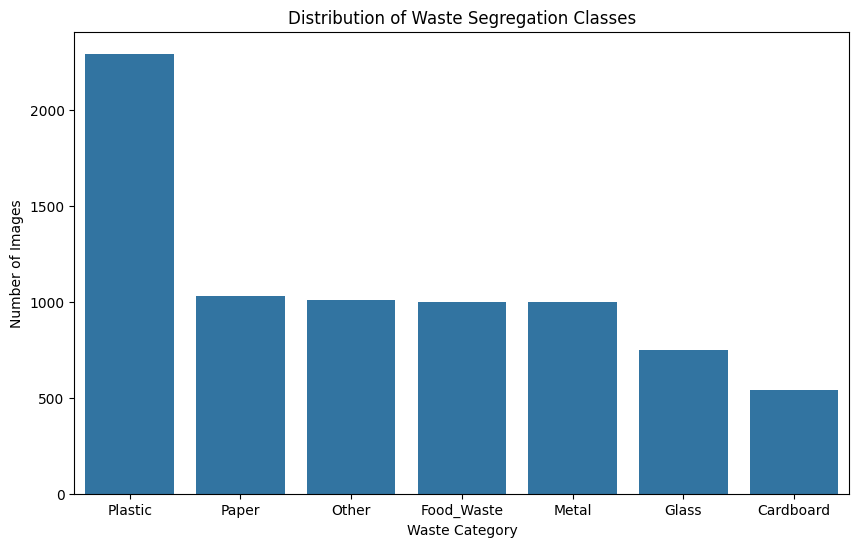

In [ ]:
# Visualise Data Distribution

# Using bar plot to show the clabel distribution

plt.figure(figsize=(10, 6))
sns.barplot(data=label_counts, x='label', y='count')


plt.title("Distribution of Waste Segregation Classes")
plt.xlabel("Waste Category")
plt.ylabel("Number of Images")
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

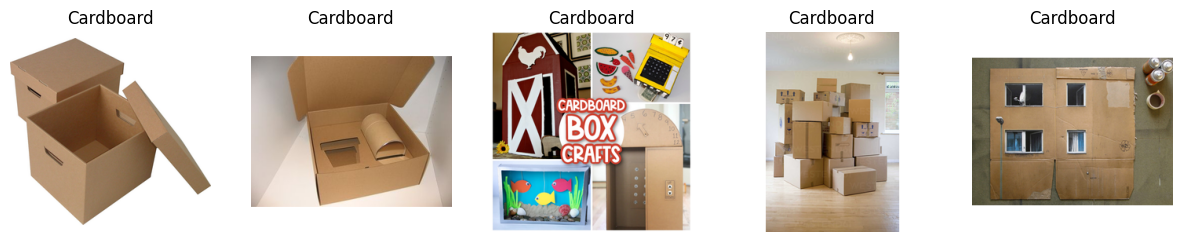

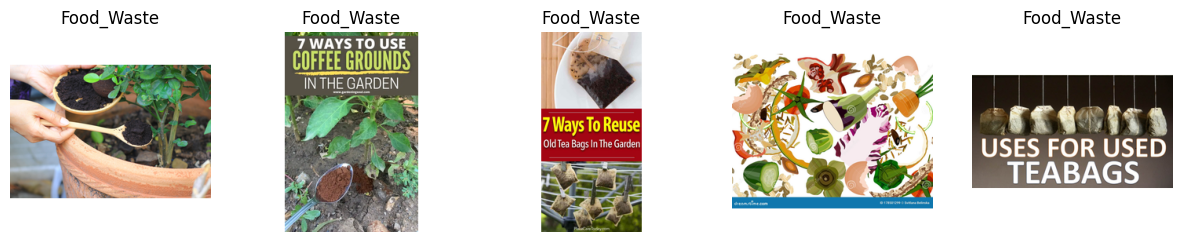

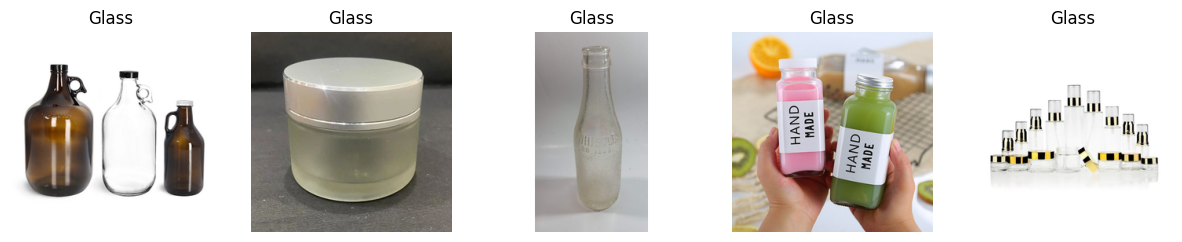

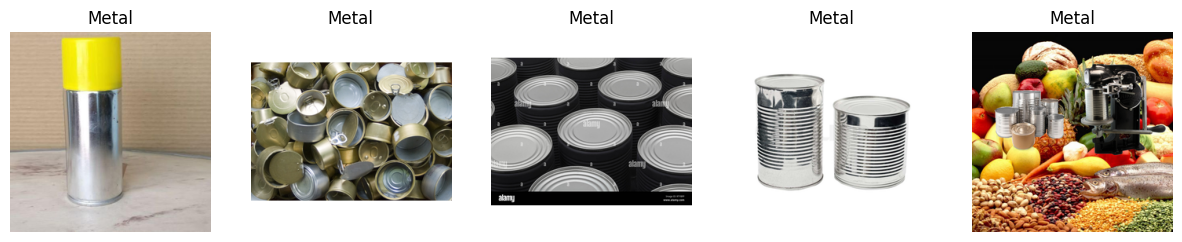

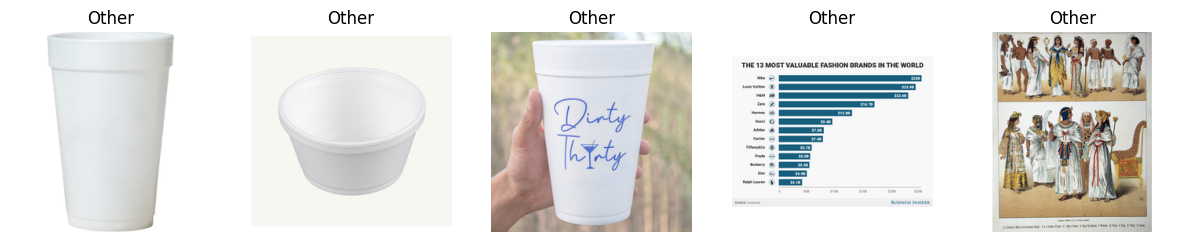

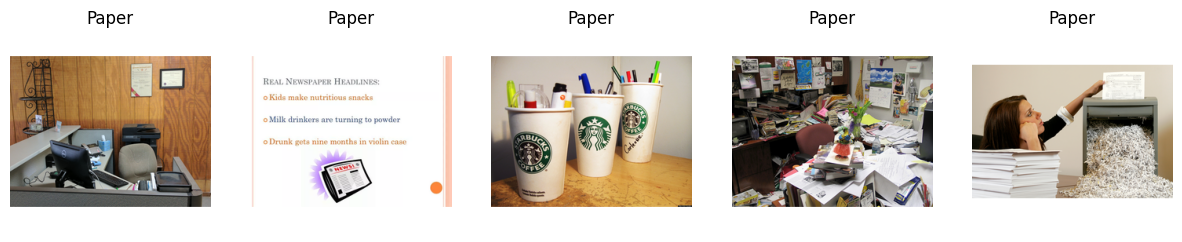

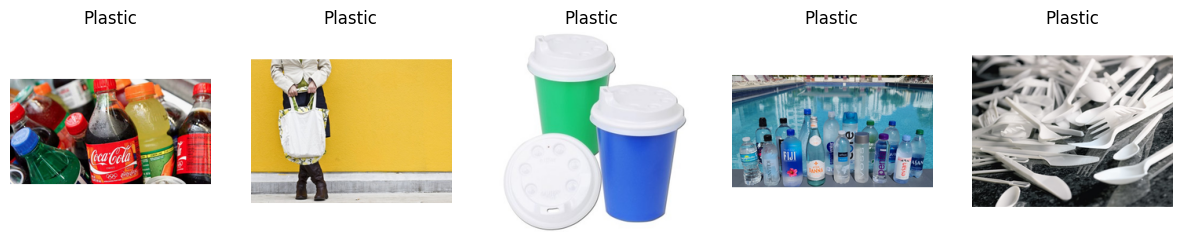

In [ ]:
# Visualise Sample Images (across different labels)

for img_class in df['label'].unique():
    sample_images = df[df['label'] == img_class].sample(5)['image']
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(sample_images):
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(img_class)
        plt.axis('off')
    plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [ ]:
# Find the smallest and largest image dimensions from the data set

widths = [img.size[0] for img in images]  # width
heights = [img.size[1] for img in images]  # height

# Print the range
print(f"Width range: {min(widths)} - {max(widths)}")
print(f"Height range: {min(heights)} - {max(heights)}")

Width range: 256 - 256
Height range: 256 - 256


In [ ]:
# Resize the image dimensions

resized_images = []
target_size = (224, 224)  # Resize to 224x224 pixels, which is a common input size for many CNN models

for img in images:
    resized_img = img.resize(target_size)
    if resized_img.mode != 'RGB':
            resized_img = resized_img.convert('RGB')        # Convert to RGB if not already in that mode
    resized_images.append(resized_img)

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [ ]:
# Encode the labels suitably

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(labels)  # Integer labels: [0, 1, 2, ..., 6]

In [ ]:
# Verify after encoding
print("Sample encoded labels:", y_encoded[:10])
print("Class mapping:", list(le.classes_))

Sample encoded labels: [0 0 0 0 0 0 0 0 0 0]
Class mapping: [np.str_('Cardboard'), np.str_('Food_Waste'), np.str_('Glass'), np.str_('Metal'), np.str_('Other'), np.str_('Paper'), np.str_('Plastic')]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [ ]:
# Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split

# Split the dataset (80% train, 20% test)

# Step 1: First split → 80% train_val and 20% test
img_train_val, img_test, label_train_val, label_test = train_test_split(
    resized_images, y_encoded, test_size=0.20, random_state=42, stratify=y_encoded
)

# Step 2: Split train_val → 85% train, 15% validation
# To make validation 15% of the total, we calculate: 20 / 80 ≈ 0.25
img_train, img_val, label_train, label_val = train_test_split(
    img_train_val, label_train_val, test_size=0.25, random_state=42, stratify=label_train_val
)

# Confirm splits
print("Training set size:", len(img_train))
print("Validation set size:", len(img_val))
print("Test set size:", len(img_test))


Training set size: 4575
Validation set size: 1525
Test set size: 1525


In [ ]:
# Define a simple data generator for train set

def simple_generator(images, labels, batch_size=32):
    num_samples = len(images)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_images = images[offset:offset+batch_size]
            batch_labels = labels[offset:offset+batch_size]

            X_batch = np.array([np.array(img.resize((224,224))) / 255.0 for img in batch_images])
            y_batch = np.array(batch_labels)

            yield X_batch, y_batch

In [ ]:
# Initialize the generators for train and validation sets

train_gen = simple_generator(img_train, label_train, batch_size=32)
val_gen   = simple_generator(img_val, label_val, batch_size=32)

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:
# Build and compile the model

# Define a function to build models with different variations

# First Model - 3 Layer Baseline CNN

def first_model(input_shape=(224, 224, 3), num_classes=7):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
# Compile the model
from tensorflow.keras.optimizers import Adam

model_1 = first_model()

model_1.compile(
              optimizer = Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,863 (42.61 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Build a second model - 5 Layer CNN with Batch Normalization

def second_model(input_shape=(224, 224, 3), num_classes=7):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.GlobalAveragePooling2D(),

        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
# Compile the second model

model_2 = second_model()

model_2.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 111, 111, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 111, 111, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,631 (682.15 KB)

 Trainable params: 174,439 (681.40 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Build a thrid model - 6 Layer CNN with Progressive Filters

def third_model(input_shape=(224, 224, 3), num_classes=7):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu'),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
# Compile the third model

model_3 = third_model()

model_3.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 110, 110, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 53, 53, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    40,960,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,103,911 (156.80 MB)

 Trainable params: 41,103,719 (156.80 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Build fourth model - 7 Layer CNN with Seperable Convolutions and GlobalAveragePolling

def fourth_model(input_shape=(224, 224, 3), num_classes=7):
    model = models.Sequential([
        layers.SeparableConv2D(32, (3, 3), activation='relu', input_shape=input_shape),

        layers.SeparableConv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.SeparableConv2D(64, (3, 3), activation='relu'),

        layers.SeparableConv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.SeparableConv2D(128, (3, 3), activation='relu'),

        layers.SeparableConv2D(128, (3, 3), activation='relu'),
        layers.GlobalAveragePooling2D(),

        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
# Compile the fourth model

model_4 = fourth_model()

model_4.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_4.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ separable_conv2d                │ (None, 222, 222, 32)   │           155 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 220, 220, 32)   │         1,344 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_2              │ (None, 108, 108, 64)   │         2,400 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_3              │ (None, 106, 106, 64)   │         4,736 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_4              │ (None, 51, 51, 128)    │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_5              │ (None, 49, 49, 128)    │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,018 (273.51 KB)

 Trainable params: 70,018 (273.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Build a fifth model - 8 Layer CNN with dropout at multiple level

def fifth_model(input_shape=(224, 224, 3), num_classes=7):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.2),

        layers.Conv2D(64, (3, 3), activation='relu'),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu'),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
# Compile the fifth model

model_5 = fifth_model()

model_5.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_5.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 49, 49, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    37,749,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,039,847 (145.11 MB)

 Trainable params: 38,039,847 (145.11 MB)

 Non-trainable params: 0 (0.00 B)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training

# Setup callbacks

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

def get_callbacks(model_name='model'):
    return [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True,  verbose=1),
        ModelCheckpoint(f'{model_name}_best.h5', monitor='val_accuracy', save_best_only=True,verbose=1),
        ReduceLROnPlateau(monitor='val_accuracy', factor=0.7, patience=4, verbose=1, min_lr=1e-6)
    ]

In [ ]:
# Build a training model

import time

def train_model(model, train_gen, val_gen, img_train_len, img_val_len, epochs=10, batch_size=32, model_name='model'):
    callbacks = get_callbacks(model_name)

    print(f"\nStarting training for {model_name}...")
    start_time = time.time()

    history = model.fit(
        train_gen,
        steps_per_epoch=img_train_len // batch_size,
        validation_data=val_gen,
        validation_steps=img_val_len // batch_size,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    training_time = time.time() - start_time

     # Evaluate with best weights restored
    val_loss, val_acc = model.evaluate(val_gen, steps=img_val_len // batch_size, verbose=0)

    best_val_acc = max(history.history['val_accuracy'])
    best_val_acc_epoch = history.history['val_accuracy'].index(best_val_acc) + 1
    final_train_acc = history.history['accuracy'][-1]
    final_train_loss = history.history['loss'][-1]

    print(f"\nTraining completed for {model_name} in {round(training_time/60, 2)} mins.")
    print(f"Best validation accuracy: {best_val_acc:.4f} at epoch {best_val_acc_epoch}")
    print(f"Final training accuracy: {final_train_acc:.4f}")

    results = {
        'training_time_mins': round(training_time/60, 2),
        'best_val_accuracy': round(best_val_acc, 4),
        'best_val_acc_epoch': best_val_acc_epoch,
        'final_train_accuracy': round(final_train_acc, 4),
        'final_train_loss': round(final_train_loss, 4),
        'history': history.history,
        'parameters': model.count_params()
    }

    return history, val_acc, results

In [ ]:
# Train model1

history1, val_acc1, results1 = train_model(model_1, train_gen, val_gen, len(img_train), len(img_val), epochs=10, batch_size=32, model_name='model_1')


Starting training for model_1...
Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.2945 - loss: 1.8417
Epoch 1: val_accuracy improved from -inf to 0.34176, saving model to model_1_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.2946 - loss: 1.8414 - val_accuracy: 0.3418 - val_loss: 1.6743 - learning_rate: 1.0000e-04
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.3444 - loss: 1.6940
Epoch 2: val_accuracy improved from 0.34176 to 0.34973, saving model to model_1_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.3444 - loss: 1.6939 - val_accuracy: 0.3497 - val_loss: 1.6334 - learning_rate: 1.0000e-04
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3831 - loss: 1.6120
Epoch 3: val_accuracy improved from 0.34973 to 0.39295, saving model to model_1_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step - accuracy: 0.3831 - loss: 1.6119 - val_accuracy: 0.3930 - val_loss: 1.5575 - learning_rate: 1.0000e-04
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4102 - loss: 1.5207
Epoch 4: val_accuracy improved from 0.39295 to 0.40991, saving model to model_1_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.4102 - loss: 1.5206 - val_accuracy: 0.4099 - val_loss: 1.5228 - learning_rate: 1.0000e-04
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4432 - loss: 1.4369
Epoch 5: val_accuracy improved from 0.40991 to 0.42620, saving model to model_1_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - accuracy: 0.4433 - loss: 1.4368 - val_accuracy: 0.4262 - val_loss: 1.4673 - learning_rate: 1.0000e-04
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4747 - loss: 1.3554
Epoch 6: val_accuracy improved from 0.42620 to 0.46818, saving model to model_1_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step - accuracy: 0.4748 - loss: 1.3553 - val_accuracy: 0.4682 - val_loss: 1.4170 - learning_rate: 1.0000e-04
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5142 - loss: 1.2757
Epoch 7: val_accuracy improved from 0.46818 to 0.48158, saving model to model_1_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - accuracy: 0.5143 - loss: 1.2755 - val_accuracy: 0.4816 - val_loss: 1.3892 - learning_rate: 1.0000e-04
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5658 - loss: 1.1842
Epoch 8: val_accuracy improved from 0.48158 to 0.50368, saving model to model_1_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.5658 - loss: 1.1841 - val_accuracy: 0.5037 - val_loss: 1.3539 - learning_rate: 1.0000e-04
Epoch 9/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5962 - loss: 1.0946
Epoch 9: val_accuracy improved from 0.50368 to 0.52311, saving model to model_1_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.5962 - loss: 1.0945 - val_accuracy: 0.5231 - val_loss: 1.3717 - learning_rate: 1.0000e-04
Epoch 10/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6377 - loss: 0.9943
Epoch 10: val_accuracy did not improve from 0.52311
142/142 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.6376 - loss: 0.9943 - val_accuracy: 0.5204 - val_loss: 1.3754 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 8.

Training completed for model_1 in 3.1 mins.
Best validation accuracy: 0.5231 at epoch 9
Final training accuracy: 0.6357


In [ ]:
# Train model2

history2, val_acc2, results2 = train_model(model_2, train_gen, val_gen, len(img_train), len(img_val), epochs=25, batch_size=32, model_name='model_2')


Starting training for model_2...
Epoch 1/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.2902 - loss: 1.8095
Epoch 1: val_accuracy improved from -inf to 0.29873, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 50s 253ms/step - accuracy: 0.2904 - loss: 1.8090 - val_accuracy: 0.2987 - val_loss: 1.9051 - learning_rate: 1.0000e-04
Epoch 2/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.3543 - loss: 1.6413
Epoch 2: val_accuracy improved from 0.29873 to 0.30409, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 37s 262ms/step - accuracy: 0.3545 - loss: 1.6412 - val_accuracy: 0.3041 - val_loss: 1.9308 - learning_rate: 1.0000e-04
Epoch 3/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4118 - loss: 1.5585
Epoch 3: val_accuracy improved from 0.30409 to 0.33825, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - accuracy: 0.4118 - loss: 1.5584 - val_accuracy: 0.3382 - val_loss: 1.8028 - learning_rate: 1.0000e-04
Epoch 4/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.4167 - loss: 1.5348
Epoch 4: val_accuracy improved from 0.33825 to 0.41460, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.4168 - loss: 1.5347 - val_accuracy: 0.4146 - val_loss: 1.5982 - learning_rate: 1.0000e-04
Epoch 5/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4374 - loss: 1.4936
Epoch 5: val_accuracy improved from 0.41460 to 0.43603, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.4375 - loss: 1.4936 - val_accuracy: 0.4360 - val_loss: 1.5352 - learning_rate: 1.0000e-04
Epoch 6/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4418 - loss: 1.4814
Epoch 6: val_accuracy improved from 0.43603 to 0.44474, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.4419 - loss: 1.4814 - val_accuracy: 0.4447 - val_loss: 1.4915 - learning_rate: 1.0000e-04
Epoch 7/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4679 - loss: 1.4498
Epoch 7: val_accuracy improved from 0.44474 to 0.46417, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.4679 - loss: 1.4497 - val_accuracy: 0.4642 - val_loss: 1.4322 - learning_rate: 1.0000e-04
Epoch 8/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4572 - loss: 1.4450
Epoch 8: val_accuracy improved from 0.46417 to 0.46484, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - accuracy: 0.4573 - loss: 1.4449 - val_accuracy: 0.4648 - val_loss: 1.4407 - learning_rate: 1.0000e-04
Epoch 9/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.4740 - loss: 1.4191
Epoch 9: val_accuracy did not improve from 0.46484
142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.4740 - loss: 1.4190 - val_accuracy: 0.4267 - val_loss: 1.5306 - learning_rate: 1.0000e-04
Epoch 10/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4787 - loss: 1.3958
Epoch 10: val_accuracy improved from 0.46484 to 0.48493, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.4787 - loss: 1.3958 - val_accuracy: 0.4849 - val_loss: 1.4450 - learning_rate: 1.0000e-04
Epoch 11/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4922 - loss: 1.3919
Epoch 11: val_accuracy did not improve from 0.48493
142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - accuracy: 0.4921 - loss: 1.3918 - val_accuracy: 0.4829 - val_loss: 1.4348 - learning_rate: 1.0000e-04
Epoch 12/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4991 - loss: 1.3846
Epoch 12: val_accuracy improved from 0.48493 to 0.48560, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.4992 - loss: 1.3844 - val_accuracy: 0.4856 - val_loss: 1.4185 - learning_rate: 1.0000e-04
Epoch 13/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4967 - loss: 1.3456
Epoch 13: val_accuracy improved from 0.48560 to 0.49699, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.4967 - loss: 1.3456 - val_accuracy: 0.4970 - val_loss: 1.3929 - learning_rate: 1.0000e-04
Epoch 14/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5101 - loss: 1.3353
Epoch 14: val_accuracy improved from 0.49699 to 0.52244, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - accuracy: 0.5101 - loss: 1.3353 - val_accuracy: 0.5224 - val_loss: 1.3746 - learning_rate: 1.0000e-04
Epoch 15/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.5089 - loss: 1.3313
Epoch 15: val_accuracy did not improve from 0.52244
142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - accuracy: 0.5090 - loss: 1.3312 - val_accuracy: 0.5144 - val_loss: 1.3921 - learning_rate: 1.0000e-04
Epoch 16/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5133 - loss: 1.3163
Epoch 16: val_accuracy did not improve from 0.52244
142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.5134 - loss: 1.3162 - val_accuracy: 0.5057 - val_loss: 1.4177 - learning_rate: 1.0000e-04
Epoch 17/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5170 - loss: 1.3065
Epoch 17: val_accuracy did not improve from 0.52244
142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - accuracy: 0.5171 - loss: 1.3064 - val_accuracy: 0.4769 - val_loss: 1.4499 - learning_ra

142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - accuracy: 0.5464 - loss: 1.2601 - val_accuracy: 0.5271 - val_loss: 1.3353 - learning_rate: 7.0000e-05
Epoch 20/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5500 - loss: 1.2317
Epoch 20: val_accuracy improved from 0.52713 to 0.54186, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.5500 - loss: 1.2317 - val_accuracy: 0.5419 - val_loss: 1.3125 - learning_rate: 7.0000e-05
Epoch 21/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5587 - loss: 1.2171
Epoch 21: val_accuracy improved from 0.54186 to 0.55526, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.5587 - loss: 1.2171 - val_accuracy: 0.5553 - val_loss: 1.2853 - learning_rate: 7.0000e-05
Epoch 22/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5668 - loss: 1.2118
Epoch 22: val_accuracy did not improve from 0.55526
142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.5668 - loss: 1.2118 - val_accuracy: 0.5546 - val_loss: 1.2768 - learning_rate: 7.0000e-05
Epoch 23/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.5578 - loss: 1.2216
Epoch 23: val_accuracy improved from 0.55526 to 0.55794, saving model to model_2_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.5579 - loss: 1.2215 - val_accuracy: 0.5579 - val_loss: 1.2801 - learning_rate: 7.0000e-05
Epoch 24/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5652 - loss: 1.1963
Epoch 24: val_accuracy did not improve from 0.55794
142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.5653 - loss: 1.1962 - val_accuracy: 0.5519 - val_loss: 1.2645 - learning_rate: 7.0000e-05
Epoch 25/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.5683 - loss: 1.1864
Epoch 25: val_accuracy did not improve from 0.55794
142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.5684 - loss: 1.1864 - val_accuracy: 0.5345 - val_loss: 1.2809 - learning_rate: 7.0000e-05
Restoring model weights from the end of the best epoch: 24.

Training completed for model_2 in 9.08 mins.
Best validation accuracy: 0.5579 at epoch 23
Final training accuracy: 0.5710


In [ ]:
# Train model3

history3, val_acc3, results3 = train_model(model_3, train_gen, val_gen, len(img_train), len(img_val), epochs=30, batch_size=32, model_name='model_3')


Starting training for model_3...
Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.2699 - loss: 4.1936
Epoch 1: val_accuracy improved from -inf to 0.29940, saving model to model_3_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 62s 327ms/step - accuracy: 0.2702 - loss: 4.1817 - val_accuracy: 0.2994 - val_loss: 1.8888 - learning_rate: 1.0000e-04
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.3930 - loss: 1.5911
Epoch 2: val_accuracy improved from 0.29940 to 0.30476, saving model to model_3_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 29s 206ms/step - accuracy: 0.3930 - loss: 1.5910 - val_accuracy: 0.3048 - val_loss: 1.8567 - learning_rate: 1.0000e-04
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.4216 - loss: 1.5247
Epoch 3: val_accuracy improved from 0.30476 to 0.37843, saving model to model_3_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 31s 217ms/step - accuracy: 0.4217 - loss: 1.5246 - val_accuracy: 0.3784 - val_loss: 1.6369 - learning_rate: 1.0000e-04
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.4439 - loss: 1.4562
Epoch 4: val_accuracy improved from 0.37843 to 0.43804, saving model to model_3_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 36s 256ms/step - accuracy: 0.4440 - loss: 1.4560 - val_accuracy: 0.4380 - val_loss: 1.4838 - learning_rate: 1.0000e-04
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5001 - loss: 1.3270
Epoch 5: val_accuracy improved from 0.43804 to 0.51239, saving model to model_3_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 30s 212ms/step - accuracy: 0.5001 - loss: 1.3270 - val_accuracy: 0.5124 - val_loss: 1.3883 - learning_rate: 1.0000e-04
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5239 - loss: 1.2383
Epoch 6: val_accuracy did not improve from 0.51239
142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.5239 - loss: 1.2382 - val_accuracy: 0.4823 - val_loss: 1.4036 - learning_rate: 1.0000e-04
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.5542 - loss: 1.1711
Epoch 7: val_accuracy did not improve from 0.51239
142/142 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.5543 - loss: 1.1709 - val_accuracy: 0.4990 - val_loss: 1.3726 - learning_rate: 1.0000e-04
Epoch 8/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.5789 - loss: 1.0853
Epoch 8: val_accuracy improved from 0.51239 to 0.52110, saving model to model_3_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 34s 237ms/step - accuracy: 0.5789 - loss: 1.0853 - val_accuracy: 0.5211 - val_loss: 1.3375 - learning_rate: 1.0000e-04
Epoch 9/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6289 - loss: 0.9998
Epoch 9: val_accuracy improved from 0.52110 to 0.53851, saving model to model_3_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 164ms/step - accuracy: 0.6288 - loss: 0.9998 - val_accuracy: 0.5385 - val_loss: 1.2947 - learning_rate: 1.0000e-04
Epoch 10/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6464 - loss: 0.9246
Epoch 10: val_accuracy improved from 0.53851 to 0.55593, saving model to model_3_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 54s 383ms/step - accuracy: 0.6464 - loss: 0.9247 - val_accuracy: 0.5559 - val_loss: 1.2548 - learning_rate: 1.0000e-04
Epoch 11/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6676 - loss: 0.8659
Epoch 11: val_accuracy did not improve from 0.55593
142/142 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.6677 - loss: 0.8658 - val_accuracy: 0.4856 - val_loss: 1.5311 - learning_rate: 1.0000e-04
Epoch 12/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6959 - loss: 0.8021
Epoch 12: val_accuracy did not improve from 0.55593
142/142 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.6958 - loss: 0.8022 - val_accuracy: 0.5238 - val_loss: 1.4014 - learning_rate: 1.0000e-04
Epoch 13/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7100 - loss: 0.7494
Epoch 13: val_accuracy did not improve from 0.55593
142/142 ━━━━━━━━━━━━━━━━━━━━ 41s 287ms/step - accuracy: 0.7099 - loss: 0.7495 - val_accuracy: 0.5539 - val_loss: 1.4017 - learning_ra

142/142 ━━━━━━━━━━━━━━━━━━━━ 34s 243ms/step - accuracy: 0.7355 - loss: 0.6798 - val_accuracy: 0.5787 - val_loss: 1.2621 - learning_rate: 1.0000e-04
Epoch 15/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7673 - loss: 0.6318
Epoch 15: val_accuracy improved from 0.57870 to 0.59411, saving model to model_3_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 33s 230ms/step - accuracy: 0.7672 - loss: 0.6318 - val_accuracy: 0.5941 - val_loss: 1.2601 - learning_rate: 1.0000e-04
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 10.

Training completed for model_3 in 8.26 mins.
Best validation accuracy: 0.5941 at epoch 15
Final training accuracy: 0.7599


In [ ]:
# Train model4

history4, val_acc4, results4 = train_model(model_4, train_gen, val_gen, len(img_train), len(img_val), epochs=25, batch_size=32, model_name='model_4')


Starting training for model_4...
Epoch 1/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.2830 - loss: 1.9421
Epoch 1: val_accuracy improved from -inf to 0.30208, saving model to model_4_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 55s 264ms/step - accuracy: 0.2831 - loss: 1.9420 - val_accuracy: 0.3021 - val_loss: 1.9227 - learning_rate: 1.0000e-04
Epoch 2/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3012 - loss: 1.9032
Epoch 2: val_accuracy did not improve from 0.30208
142/142 ━━━━━━━━━━━━━━━━━━━━ 16s 116ms/step - accuracy: 0.3012 - loss: 1.9031 - val_accuracy: 0.3021 - val_loss: 1.8502 - learning_rate: 1.0000e-04
Epoch 3/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.3045 - loss: 1.8508
Epoch 3: val_accuracy did not improve from 0.30208
142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.3045 - loss: 1.8508 - val_accuracy: 0.3021 - val_loss: 1.8478 - learning_rate: 1.0000e-04
Epoch 4/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3071 - loss: 1.8524
Epoch 4: val_accuracy improved from 0.30208 to 0.30409, saving model to model_4_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.3071 - loss: 1.8524 - val_accuracy: 0.3041 - val_loss: 1.8457 - learning_rate: 1.0000e-04
Epoch 5/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3045 - loss: 1.8547
Epoch 5: val_accuracy improved from 0.30409 to 0.30476, saving model to model_4_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.3045 - loss: 1.8547 - val_accuracy: 0.3048 - val_loss: 1.8446 - learning_rate: 1.0000e-04
Epoch 6/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3038 - loss: 1.8532
Epoch 6: val_accuracy did not improve from 0.30476
142/142 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.3037 - loss: 1.8532 - val_accuracy: 0.3034 - val_loss: 1.8466 - learning_rate: 1.0000e-04
Epoch 7/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3031 - loss: 1.8576
Epoch 7: val_accuracy did not improve from 0.30476
142/142 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.3031 - loss: 1.8576 - val_accuracy: 0.3027 - val_loss: 1.8472 - learning_rate: 1.0000e-04
Epoch 8/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3098 - loss: 1.8451
Epoch 8: val_accuracy improved from 0.30476 to 0.30610, saving model to model_4_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.3097 - loss: 1.8451 - val_accuracy: 0.3061 - val_loss: 1.8434 - learning_rate: 1.0000e-04
Epoch 9/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.3067 - loss: 1.8483
Epoch 9: val_accuracy did not improve from 0.30610
142/142 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.3067 - loss: 1.8483 - val_accuracy: 0.3048 - val_loss: 1.8416 - learning_rate: 1.0000e-04
Epoch 10/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3008 - loss: 1.8490
Epoch 10: val_accuracy did not improve from 0.30610
142/142 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.3008 - loss: 1.8490 - val_accuracy: 0.3039 - val_loss: 1.8380 - learning_rate: 1.0000e-04
Epoch 11/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.2960 - loss: 1.8553
Epoch 11: val_accuracy did not improve from 0.30610
142/142 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - accuracy: 0.2960 - loss: 1.8552 - val_accuracy: 0.3012 - val_loss: 1.8313 - learning_rate: 1

142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.3062 - loss: 1.7766 - val_accuracy: 0.3088 - val_loss: 1.7487 - learning_rate: 3.4300e-05
Epoch 24/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3080 - loss: 1.7739
Epoch 24: val_accuracy did not improve from 0.30877
142/142 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.3080 - loss: 1.7738 - val_accuracy: 0.3061 - val_loss: 1.7489 - learning_rate: 3.4300e-05
Epoch 25/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3181 - loss: 1.7690
Epoch 25: val_accuracy improved from 0.30877 to 0.31279, saving model to model_4_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - accuracy: 0.3181 - loss: 1.7689 - val_accuracy: 0.3128 - val_loss: 1.7415 - learning_rate: 3.4300e-05
Restoring model weights from the end of the best epoch: 25.

Training completed for model_4 in 8.41 mins.
Best validation accuracy: 0.3128 at epoch 25
Final training accuracy: 0.3185


In [ ]:
# Train model5

history5, val_acc5, results5 = train_model(model_5, train_gen, val_gen, len(img_train), len(img_val), epochs=30, batch_size=32, model_name='model_5')


Starting training for model_5...
Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.2676 - loss: 1.9028
Epoch 1: val_accuracy improved from -inf to 0.32686, saving model to model_5_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 61s 368ms/step - accuracy: 0.2678 - loss: 1.9023 - val_accuracy: 0.3269 - val_loss: 1.7822 - learning_rate: 1.0000e-04
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.3322 - loss: 1.7419
Epoch 2: val_accuracy improved from 0.32686 to 0.37977, saving model to model_5_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 84s 594ms/step - accuracy: 0.3323 - loss: 1.7416 - val_accuracy: 0.3798 - val_loss: 1.6474 - learning_rate: 1.0000e-04
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.3653 - loss: 1.6254
Epoch 3: val_accuracy improved from 0.37977 to 0.41192, saving model to model_5_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 51s 363ms/step - accuracy: 0.3654 - loss: 1.6253 - val_accuracy: 0.4119 - val_loss: 1.5906 - learning_rate: 1.0000e-04
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.4026 - loss: 1.5410
Epoch 4: val_accuracy improved from 0.41192 to 0.42599, saving model to model_5_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 45s 318ms/step - accuracy: 0.4027 - loss: 1.5408 - val_accuracy: 0.4260 - val_loss: 1.5148 - learning_rate: 1.0000e-04
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.4540 - loss: 1.4529
Epoch 5: val_accuracy improved from 0.42599 to 0.45814, saving model to model_5_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 86s 607ms/step - accuracy: 0.4540 - loss: 1.4529 - val_accuracy: 0.4581 - val_loss: 1.4579 - learning_rate: 1.0000e-04
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.4747 - loss: 1.3768
Epoch 6: val_accuracy improved from 0.45814 to 0.47354, saving model to model_5_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 47s 333ms/step - accuracy: 0.4747 - loss: 1.3767 - val_accuracy: 0.4735 - val_loss: 1.4021 - learning_rate: 1.0000e-04
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5240 - loss: 1.3029
Epoch 7: val_accuracy improved from 0.47354 to 0.48024, saving model to model_5_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 43s 304ms/step - accuracy: 0.5240 - loss: 1.3028 - val_accuracy: 0.4802 - val_loss: 1.3984 - learning_rate: 1.0000e-04
Epoch 8/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5351 - loss: 1.2378
Epoch 8: val_accuracy improved from 0.48024 to 0.51239, saving model to model_5_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 84s 596ms/step - accuracy: 0.5352 - loss: 1.2376 - val_accuracy: 0.5124 - val_loss: 1.3614 - learning_rate: 1.0000e-04
Epoch 9/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5862 - loss: 1.1186
Epoch 9: val_accuracy improved from 0.51239 to 0.52780, saving model to model_5_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 78s 552ms/step - accuracy: 0.5863 - loss: 1.1183 - val_accuracy: 0.5278 - val_loss: 1.3670 - learning_rate: 1.0000e-04
Epoch 10/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6357 - loss: 1.0083
Epoch 10: val_accuracy improved from 0.52780 to 0.54655, saving model to model_5_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 47s 333ms/step - accuracy: 0.6358 - loss: 1.0080 - val_accuracy: 0.5466 - val_loss: 1.3792 - learning_rate: 1.0000e-04
Epoch 11/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.6792 - loss: 0.8752
Epoch 11: val_accuracy did not improve from 0.54655
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 160ms/step - accuracy: 0.6793 - loss: 0.8751 - val_accuracy: 0.5425 - val_loss: 1.4226 - learning_rate: 1.0000e-04
Epoch 12/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.7343 - loss: 0.7438
Epoch 12: val_accuracy did not improve from 0.54655
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - accuracy: 0.7344 - loss: 0.7438 - val_accuracy: 0.5412 - val_loss: 1.4752 - learning_rate: 1.0000e-04
Epoch 13/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7611 - loss: 0.6514
Epoch 13: val_accuracy improved from 0.54655 to 0.55995, saving model to model_5_best.h5


142/142 ━━━━━━━━━━━━━━━━━━━━ 72s 510ms/step - accuracy: 0.7613 - loss: 0.6512 - val_accuracy: 0.5599 - val_loss: 1.4816 - learning_rate: 1.0000e-04
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 8.

Training completed for model_5 in 12.41 mins.
Best validation accuracy: 0.5599 at epoch 13
Final training accuracy: 0.7781


In [ ]:
# Save the models
import os
import json
import pickle

def save_model_artifacts(model, history, results_dict, model_name, save_dir='saved_models'):
    os.makedirs(save_dir, exist_ok=True)

    # Save model (architecture + weights)
    model.save(os.path.join(save_dir, f"{model_name}.keras"))

    # Save training history
    with open(os.path.join(save_dir, f"{model_name}_history.pkl"), 'wb') as f:
        pickle.dump(history.history, f)

    # Save results (metrics, etc.)
    with open(os.path.join(save_dir, f"{model_name}_results.json"), 'w') as f:
        json.dump(results_dict, f, indent=4)

    print(f"✅ Saved: {model_name}")


In [ ]:
# Save all the models trained

save_model_artifacts(model_1, history1, results1, 'model_1')
save_model_artifacts(model_2, history2, results2, 'model_2')
save_model_artifacts(model_3, history3, results3, 'model_3')
save_model_artifacts(model_4, history4, results4, 'model_4')
save_model_artifacts(model_5, history5, results5, 'model_5')

✅ Saved: model_1
✅ Saved: model_2
✅ Saved: model_3
✅ Saved: model_4
✅ Saved: model_5


In [ ]:
# Function to load a saved model

from tensorflow.keras.models import load_model
import pickle
import json

def load_model_artifacts(model_name, save_dir='saved_models'):
    model = load_model(os.path.join(save_dir, f"{model_name}.keras"))

    with open(os.path.join(save_dir, f"{model_name}_history.pkl"), 'rb') as f:
        history = pickle.load(f)

    with open(os.path.join(save_dir, f"{model_name}_results.json"), 'r') as f:
        results = json.load(f)

    print(f"✅ Loaded: {model_name}")
    return model, history, results

In [ ]:
from google.colab import files
uploaded = files.upload()  # upload the .zip file

# Unzip
!unzip saved_models.zip

In [ ]:
# Load the saved models
model_1, history1, results1 = load_model_artifacts('model_1')
model_2, history2, results2 = load_model_artifacts('model_2')
model_3, history3, results3 = load_model_artifacts('model_3')
model_4, history4, results4 = load_model_artifacts('model_4')
model_5, history5, results5 = load_model_artifacts('model_5')

In [ ]:
# Comparing the performance of the models built

model_comparison = {
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'],
    'Train Accuracy': [
        results1['final_train_accuracy'],
        results2['final_train_accuracy'],
        results3['final_train_accuracy'],
        results4['final_train_accuracy'],
        results5['final_train_accuracy']
    ],
    'Best Val Accuracy': [
        results1['best_val_accuracy'],
        results2['best_val_accuracy'],
        results3['best_val_accuracy'],
        results4['best_val_accuracy'],
        results5['best_val_accuracy']
    ],
    'Best Val Epoch': [
        results1['best_val_acc_epoch'],
        results2['best_val_acc_epoch'],
        results3['best_val_acc_epoch'],
        results4['best_val_acc_epoch'],
        results5['best_val_acc_epoch']
    ],
    'Train Time (mins)': [
        results1['training_time_mins'],
        results2['training_time_mins'],
        results3['training_time_mins'],
        results4['training_time_mins'],
        results5['training_time_mins']
    ],
}

df_results = pd.DataFrame(model_comparison)
df_results = df_results.sort_values(by='Best Val Accuracy', ascending=False)
print(df_results)

     Model  Train Accuracy  Best Val Accuracy  Best Val Epoch  \
2  Model 3          0.7599             0.5941              15   
4  Model 5          0.7781             0.5599              13   
1  Model 2          0.5710             0.5579              23   
0  Model 1          0.6357             0.5231               9   
3  Model 4          0.3185             0.3128              25   

   Train Time (mins)  
2               8.26  
4              12.41  
1               9.08  
0               3.10  
3               8.41  


### Insights from the Results
  - Among the five CNN models evaluated, Model 3 emerged as the best-performing architecture, achieving the highest validation accuracy of 59.41% and a strong training accuracy of 76%.
  - This model demonstrated a good balance between learning capacity and generalization.
  - Model 3's deeper architecture with progressive filters and batch normalization contributed to its success by allowing it to capture complex patterns while maintaining regularization. Based on these results
  - Model 3 was selected as the optimal model for final evaluation and potential deployment.



In [ ]:
# Save the weights of the best performing model

import shutil
shutil.copy("model_3_best.h5", "model_3_before_augmentation.h5")

'model_3_before_augmentation.h5'

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Define a finite version generator for Test set
def one_time_generator(images, labels, batch_size=32):
    num_samples = len(images)
    for offset in range(0, num_samples, batch_size):
        batch_images = images[offset:offset+batch_size]
        batch_labels = labels[offset:offset+batch_size]

        X_batch = np.array([np.array(img.resize((224,224))) / 255.0 for img in batch_images])
        y_batch = np.array(batch_labels)

        yield X_batch, y_batch

In [ ]:
# Evaluate on the test set; display suitable metrics

import math

# Reload the best weights
model_3.load_weights("model_3_best.h5")

# Reinitialize the test generator
test_gen = one_time_generator(img_test, label_test, batch_size=32)

# Use ceil to include all batches
test_steps = math.ceil(len(img_test) / 32)

# Evaluate
test_loss_before, test_accuracy_before = model_3.evaluate(test_gen, steps=test_steps, verbose=1)

print(f"\n✅ Evaluated using best checkpoint:")
print(f"Test Accuracy: {test_accuracy_before:.4f}")
print(f"Test Loss: {test_loss_before:.4f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.6289 - loss: 1.1607

✅ Evaluated using best checkpoint:
Test Accuracy: 0.6223
Test Loss: 1.2010


Observations:

- Indicates good generalization performance, especially for a 7-class image classification problem using a relatively small and diverse dataset.

## Prediction and Metrics

In [ ]:
# Initialize the test generator
test_gen_before = one_time_generator(img_test, label_test, batch_size=32)

In [ ]:
# Make Predictions on the test set and calculate the metrics

# Total steps
test_steps = int(np.ceil(len(img_test) / 32))

# Get predictions
y_pred_probs = model_3.predict(test_gen_before, steps=test_steps, verbose=1)

# Convert to predicted classes
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true labels
y_true = np.array(label_test[:len(y_pred)])

# Decode using the same LabelEncoder
y_true_decoded = le.inverse_transform(y_true)
y_pred_decoded = le.inverse_transform(y_pred)

# Classification report
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_true_decoded, y_pred_decoded))
print(f"\nPrediction Accuracy: {accuracy_score(y_true, y_pred):.4f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 357ms/step
              precision    recall  f1-score   support

   Cardboard       0.76      0.80      0.78       108
  Food_Waste       0.56      0.74      0.64       200
       Glass       0.49      0.55      0.52       150
       Metal       0.80      0.49      0.61       200
       Other       0.68      0.33      0.44       202
       Paper       0.63      0.46      0.53       206
     Plastic       0.61      0.81      0.70       459

    accuracy                           0.62      1525
   macro avg       0.65      0.60      0.60      1525
weighted avg       0.64      0.62      0.61      1525


Prediction Accuracy: 0.6223


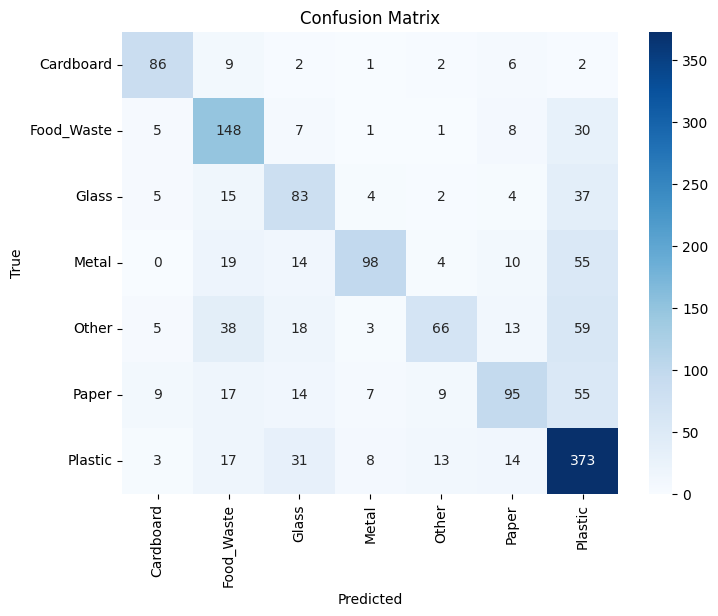

In [ ]:
# Confusion Matrix to understand the detailed per-class evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm_before = confusion_matrix(y_true_decoded, y_pred_decoded, labels=le.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm_before, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Compute confusion matrix

cm_aug = confusion_matrix(y_true_decoded, y_pred_decoded, labels=le.classes_)

# Format as DataFrame for readability
cm_df = pd.DataFrame(cm_aug, index=le.classes_, columns=le.classes_)
print("\nConfusion Matrix as Table:\n")
print(cm_df)


Confusion Matrix as Table:

            Cardboard  Food_Waste  Glass  Metal  Other  Paper  Plastic
Cardboard          86           9      2      1      2      6        2
Food_Waste          5         148      7      1      1      8       30
Glass               5          15     83      4      2      4       37
Metal               0          19     14     98      4     10       55
Other               5          38     18      3     66     13       59
Paper               9          17     14      7      9     95       55
Plastic             3          17     31      8     13     14      373


Observations:

- High confusion between Glass, Plastic, Paper — all are visually similar in certain forms (e.g., wrappers, containers).

- Cardboard and Food Waste are more distinct and thus more accurately classified.

- Confusion matrix confirms findings from precision/recall metrics.



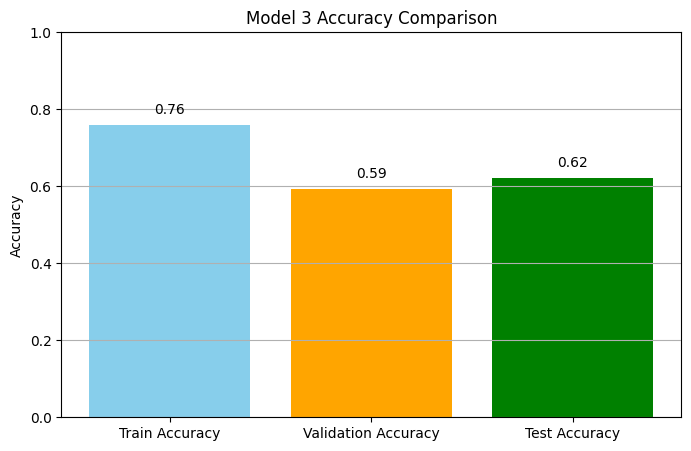

In [ ]:
# Comapre teh accuracies of the Train-Validation-Test
final_train_acc = results3['final_train_accuracy']
best_val_acc = results3['best_val_accuracy']
test_acc = test_accuracy_before

acc_values = [final_train_acc, best_val_acc, test_acc]
labels = ['Train Accuracy', 'Validation Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, acc_values, color=['skyblue', 'orange', 'green'])
plt.ylim(0, 1)
plt.title('Model 3 Accuracy Comparison')
plt.ylabel('Accuracy')

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()



 Observation
  - The model achieved a high training accuracy of 76%, the validation accuracy peaked at 59%, and test accuracy reached 62%
  - The test accuracy is higher than validation implies that the model generalizes reasonably well on unseen data
  - This ensures there is no data leakage
  - This confirms that the model captures meaningful patterns while we can perform data augmentation for further refinement

In [ ]:
# Generate classification report in dictionary form
report_dict = classification_report(y_true_decoded, y_pred_decoded, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Filter only class rows (remove 'accuracy', 'macro avg', 'weighted avg')
class_f1_scores = report_df.loc[le.classes_, 'f1-score']

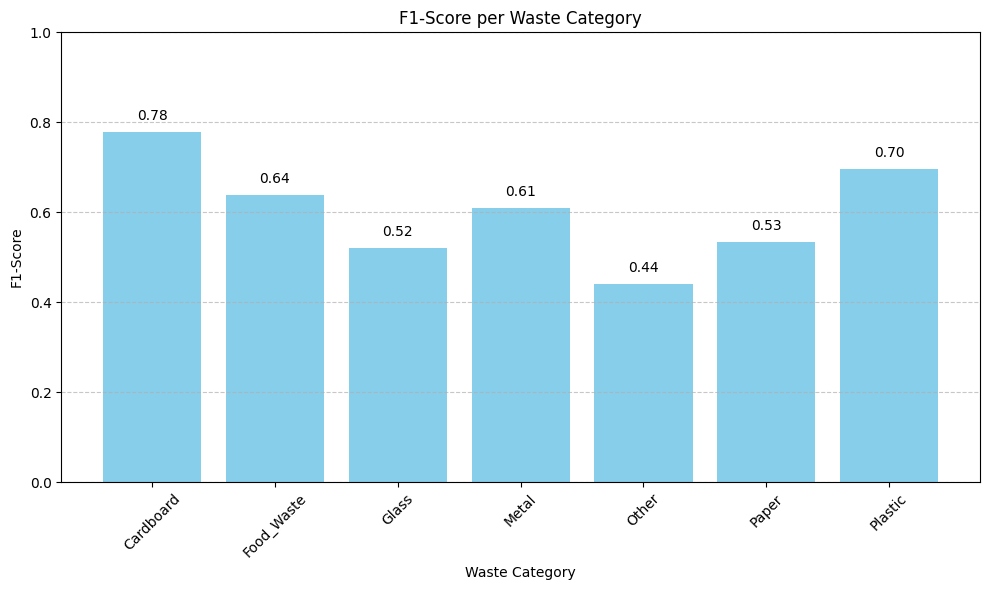

In [ ]:
# Compare F1-scores for each class
# Plot F1-scores
plt.figure(figsize=(10, 6))
bars = plt.bar(class_f1_scores.index, class_f1_scores.values, color='skyblue')
plt.ylim(0, 1)
plt.title('F1-Score per Waste Category')
plt.xlabel('Waste Category')
plt.ylabel('F1-Score')

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Observation
  - Categories like Plastic, Cardboard, and Food Waste achieved relatively high F1-scores, indicating strong precision and recall
  - Glass, Other, and Paper show lower F1-scores, suggesting misclassifications or overlapping features with other categories

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images

# Use ImageDataGenerator to define how images will be augumented
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation parameters
augmentation_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
  )

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

By understanding the class imbalance, perform the following,

  - Undersample majority classes (e.g., Plastic)

  - Augment minority classes (e.g., Cardboard)

In [ ]:
# Create a function to augment the images

from collections import defaultdict
import numpy as np
from PIL import Image
import random

def augment_and_resample(images, labels, target_count=1000, image_size=(224, 224)):
    class_to_images = defaultdict(list)

    # Step 1: Group images by class
    for img, label in zip(images, labels):
        class_to_images[label].append(img)

    augmented_images = []
    augmented_labels = []

    for class_label, img_list in class_to_images.items():
        current_count = len(img_list)

        if current_count > target_count:
            # Undersample majority class
            selected_imgs = random.sample(img_list, target_count)
        elif current_count < target_count:
            # Oversample minority class
            needed = target_count - current_count
            selected_imgs = img_list.copy()

            # Resize and convert to numpy array
            X = np.array([np.array(img.resize(image_size)) for img in img_list])
            X = X.reshape((-1, image_size[0], image_size[1], 3))

            aug_iter = augmentation_datagen.flow(X, batch_size=1)

            for _ in range(needed):
                new_img = next(aug_iter)[0].astype(np.uint8)
                selected_imgs.append(Image.fromarray(new_img))

        else:
            selected_imgs = img_list

        augmented_images.extend(selected_imgs)
        augmented_labels.extend([class_label] * len(selected_imgs))

    return augmented_images, augmented_labels


In [ ]:
# Create the augmented training dataset

aug_images, aug_labels = augment_and_resample(img_train, label_train, target_count=1000)

In [ ]:
print("Unique labels in aug_labels:", np.unique(aug_labels))
print("Sample labels:", aug_labels[:10])

Unique labels in aug_labels: [0 1 2 3 4 5 6]
Sample labels: [np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4)]


##### **4.1.2**

Train the model on the new augmented dataset.

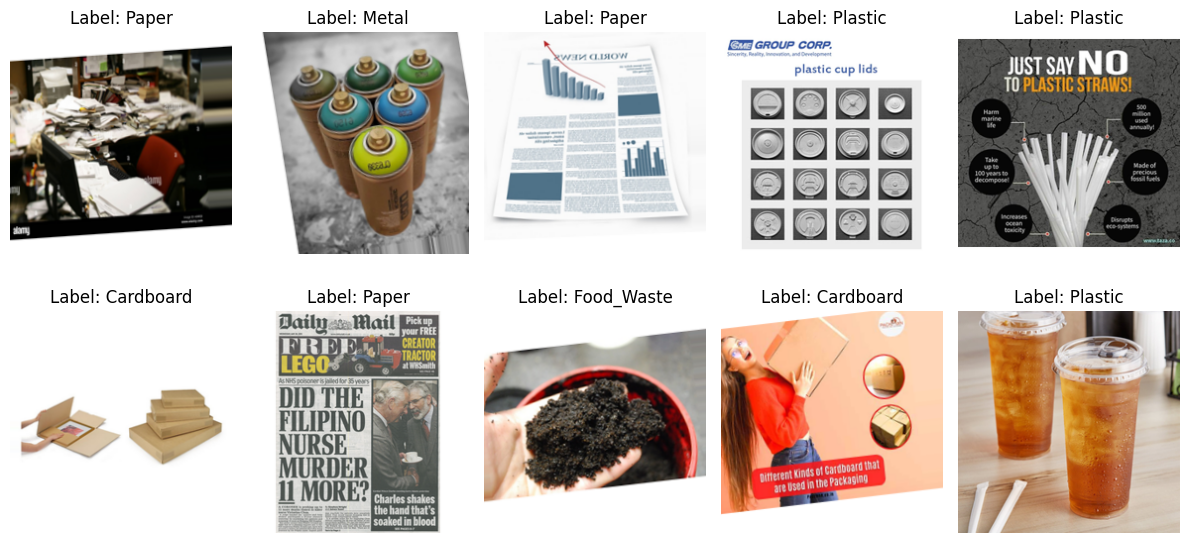

In [ ]:
import matplotlib.pyplot as plt
import random

# Show 10 random augmented images from the dataset
plt.figure(figsize=(12, 6))
for i in range(10):
    idx = random.randint(0, len(aug_images) - 1)
    plt.subplot(2, 5, i + 1)
    plt.imshow(aug_images[idx])
    label_name = le.inverse_transform([aug_labels[idx]])[0]
    plt.title(f"Label: {label_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.utils import shuffle

# Shuffle augmented training data before passing it to the generator
img_train_shuffled, label_train_shuffled = shuffle(aug_images, aug_labels, random_state=42)

In [ ]:
# Initialize generators with augmented training data
train_gen_aug = simple_generator(img_train_shuffled, label_train_shuffled, batch_size=32)

In [ ]:
# Rebuild the same model structure
model_3_aug = third_model(input_shape=(224, 224, 3), num_classes=7)

In [ ]:
# Compile the model
model_3_aug.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model_3_aug.load_weights("model_3_before_augmentation.h5")

In [ ]:
# Train the Augumented Model
history_aug, val_acc_aug, results_aug = train_model(
    model=model_3_aug,
    train_gen=train_gen_aug,
    val_gen=val_gen,
    img_train_len=len(aug_images),
    img_val_len=len(img_val),
    epochs=30,
    batch_size=32,
    model_name="model_augmented"
)


Starting training for model_augmented...
Epoch 1/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.5934 - loss: 1.1337
Epoch 1: val_accuracy improved from -inf to 0.54856, saving model to model_augmented_best.h5


218/218 ━━━━━━━━━━━━━━━━━━━━ 65s 277ms/step - accuracy: 0.5934 - loss: 1.1337 - val_accuracy: 0.5486 - val_loss: 1.3003 - learning_rate: 1.0000e-04
Epoch 2/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6174 - loss: 1.0386
Epoch 2: val_accuracy did not improve from 0.54856
218/218 ━━━━━━━━━━━━━━━━━━━━ 42s 145ms/step - accuracy: 0.6174 - loss: 1.0386 - val_accuracy: 0.5184 - val_loss: 1.4133 - learning_rate: 1.0000e-04
Epoch 3/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6868 - loss: 0.8829
Epoch 3: val_accuracy improved from 0.54856 to 0.58473, saving model to model_augmented_best.h5


218/218 ━━━━━━━━━━━━━━━━━━━━ 70s 321ms/step - accuracy: 0.6868 - loss: 0.8830 - val_accuracy: 0.5847 - val_loss: 1.2052 - learning_rate: 1.0000e-04
Epoch 4/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6866 - loss: 0.8334
Epoch 4: val_accuracy improved from 0.58473 to 0.60683, saving model to model_augmented_best.h5


218/218 ━━━━━━━━━━━━━━━━━━━━ 82s 377ms/step - accuracy: 0.6866 - loss: 0.8334 - val_accuracy: 0.6068 - val_loss: 1.3095 - learning_rate: 1.0000e-04
Epoch 5/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.7096 - loss: 0.7773
Epoch 5: val_accuracy did not improve from 0.60683
218/218 ━━━━━━━━━━━━━━━━━━━━ 38s 176ms/step - accuracy: 0.7096 - loss: 0.7772 - val_accuracy: 0.5747 - val_loss: 1.3913 - learning_rate: 1.0000e-04
Epoch 6/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.7304 - loss: 0.6884
Epoch 6: val_accuracy did not improve from 0.60683
218/218 ━━━━━━━━━━━━━━━━━━━━ 39s 176ms/step - accuracy: 0.7304 - loss: 0.6885 - val_accuracy: 0.6001 - val_loss: 1.1886 - learning_rate: 1.0000e-04
Epoch 7/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.7578 - loss: 0.6497
Epoch 7: val_accuracy improved from 0.60683 to 0.61621, saving model to model_augmented_best.h5


218/218 ━━━━━━━━━━━━━━━━━━━━ 64s 294ms/step - accuracy: 0.7579 - loss: 0.6496 - val_accuracy: 0.6162 - val_loss: 1.2810 - learning_rate: 1.0000e-04
Epoch 8/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7659 - loss: 0.6142
Epoch 8: val_accuracy did not improve from 0.61621
218/218 ━━━━━━━━━━━━━━━━━━━━ 56s 256ms/step - accuracy: 0.7659 - loss: 0.6141 - val_accuracy: 0.5948 - val_loss: 1.3850 - learning_rate: 1.0000e-04
Epoch 9/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7982 - loss: 0.5323
Epoch 9: val_accuracy did not improve from 0.61621
218/218 ━━━━━━━━━━━━━━━━━━━━ 33s 150ms/step - accuracy: 0.7982 - loss: 0.5323 - val_accuracy: 0.5861 - val_loss: 1.3365 - learning_rate: 1.0000e-04
Epoch 10/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7979 - loss: 0.5219
Epoch 10: val_accuracy did not improve from 0.61621
218/218 ━━━━━━━━━━━━━━━━━━━━ 41s 191ms/step - accuracy: 0.7979 - loss: 0.5218 - val_accuracy: 0.5941 - val_loss: 1.4341 - learning_rate: 

218/218 ━━━━━━━━━━━━━━━━━━━━ 77s 354ms/step - accuracy: 0.8198 - loss: 0.4601 - val_accuracy: 0.6216 - val_loss: 1.3449 - learning_rate: 1.0000e-04
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 6.

Training completed for model_augmented in 10.66 mins.
Best validation accuracy: 0.6216 at epoch 11
Final training accuracy: 0.8176


  - The augmented model outperforms the original one in validation accuracy — which is a strong sign that augmenting the training data helped generalization.

  - Also, it converged faster (best val acc at epoch 11), suggesting augmentation introduced useful variability.

  - Now evaluate this model on the test set using the best checkpoint weights (model_augmented_best.h5).



In [ ]:
# Evaluate the augumented model on the test set

# Reinitialize the test generator
test_gen_aug = one_time_generator(img_test, label_test, batch_size=32)

# Use ceil to include all batches
test_steps = math.ceil(len(img_test) / 32)

# Evaluate
test_loss_after, test_accuracy_after = model_3_aug.evaluate(test_gen_aug, steps=test_steps, verbose=1)

print(f"\n✅ Evaluated using best checkpoint:")
print(f"Test Accuracy: {test_accuracy_after:.4f}")
print(f"Test Loss: {test_loss_after:.4f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.6445 - loss: 1.1360

✅ Evaluated using best checkpoint:
Test Accuracy: 0.6348
Test Loss: 1.1330


Observations:

  - High Training Accuracy (81.76%)
    Your model is learning well on the augmented training data.

  - Validation Accuracy (62.16%)
    This is lower than training, which is expected — and a good validation accuracy for a 7-class task. The early peak at epoch 3 suggests early stopping was effective.

  - Test Accuracy (59.93%)
    This is consistent with your validation performance. That’s a good sign — it means the model is generalizing reasonably well, not overfitting drastically.

In [ ]:
# Initialize the test generator after augumentation
test_gen_after = one_time_generator(img_test, label_test, batch_size=32)

In [ ]:
# Make Predictions and calculate the metrics
# Total steps
test_steps = int(np.ceil(len(img_test) / 32))

# Get predictions
y_pred_probs_aug = model_3_aug.predict(test_gen_after, steps=test_steps, verbose=1)

# Convert to predicted classes
y_pred_aug = np.argmax(y_pred_probs_aug, axis=1)

# Get true labels
y_true_aug = np.array(label_test[:len(y_pred_aug)])

# Decode using the same LabelEncoder
y_true_decoded_aug = le.inverse_transform(y_true_aug)
y_pred_decoded_aug = le.inverse_transform(y_pred_aug)

# Classification report
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_true_decoded_aug, y_pred_decoded_aug))
print(f"\nPrediction Accuracy: {accuracy_score(y_true_aug, y_pred_aug):.4f}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step
              precision    recall  f1-score   support

   Cardboard       0.62      0.84      0.71       108
  Food_Waste       0.65      0.66      0.65       200
       Glass       0.59      0.53      0.56       150
       Metal       0.63      0.68      0.65       200
       Other       0.69      0.43      0.53       202
       Paper       0.56      0.56      0.56       206
     Plastic       0.67      0.72      0.69       459

    accuracy                           0.63      1525
   macro avg       0.63      0.63      0.62      1525
weighted avg       0.64      0.63      0.63      1525


Prediction Accuracy: 0.6348


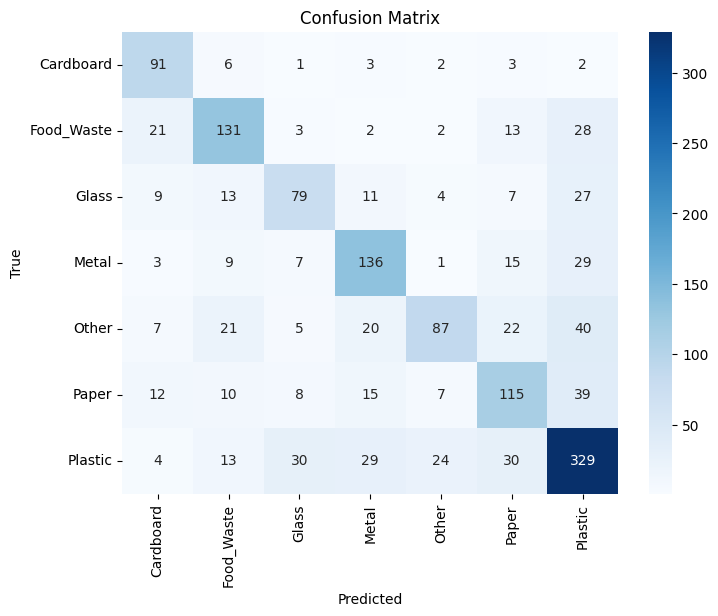

In [ ]:
# Step 4: Confusion Matrix to understand the detailed per-class evaluation after augumentation
from sklearn.preprocessing import LabelEncoder

# Confusion matrix
cm_after = confusion_matrix(y_true_decoded_aug, y_pred_decoded_aug, labels=le.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm_after, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Observations
  - Plastic is the most confused class — many predictions end up there, showing over-prediction or bias toward plastic
  - Glass and Metal suffer from major misclassifications — especially glass → plastic
  - Cardboard and Food_Waste show relatively better precision and consistency
  - Other continues to be weak — visually diverse and inconsistent patterns are likely causing this
  - Confusion matrix confirms findings from precision/recall metrics
  - These insights helped guide future improvements, such as using data augmentation

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Compute confusion matrix
cm_aug = confusion_matrix(y_true_decoded_aug, y_pred_decoded_aug, labels=le.classes_)

# Format as DataFrame for readability
cm_df = pd.DataFrame(cm_aug, index=le.classes_, columns=le.classes_)
print("\nConfusion Matrix as Table:\n")
print(cm_df)


Confusion Matrix as Table:

            Cardboard  Food_Waste  Glass  Metal  Other  Paper  Plastic
Cardboard          91           6      1      3      2      3        2
Food_Waste         21         131      3      2      2     13       28
Glass               9          13     79     11      4      7       27
Metal               3           9      7    136      1     15       29
Other               7          21      5     20     87     22       40
Paper              12          10      8     15      7    115       39
Plastic             4          13     30     29     24     30      329


Comparing the resulta Before and After Augumentation

In [ ]:
# Generate classification report in dictionary form
report_dict_after_aug = classification_report(y_true_decoded_aug, y_pred_decoded_aug, output_dict=True)

# Convert to DataFrame
report_df_after_aug = pd.DataFrame(report_dict_after_aug).transpose()

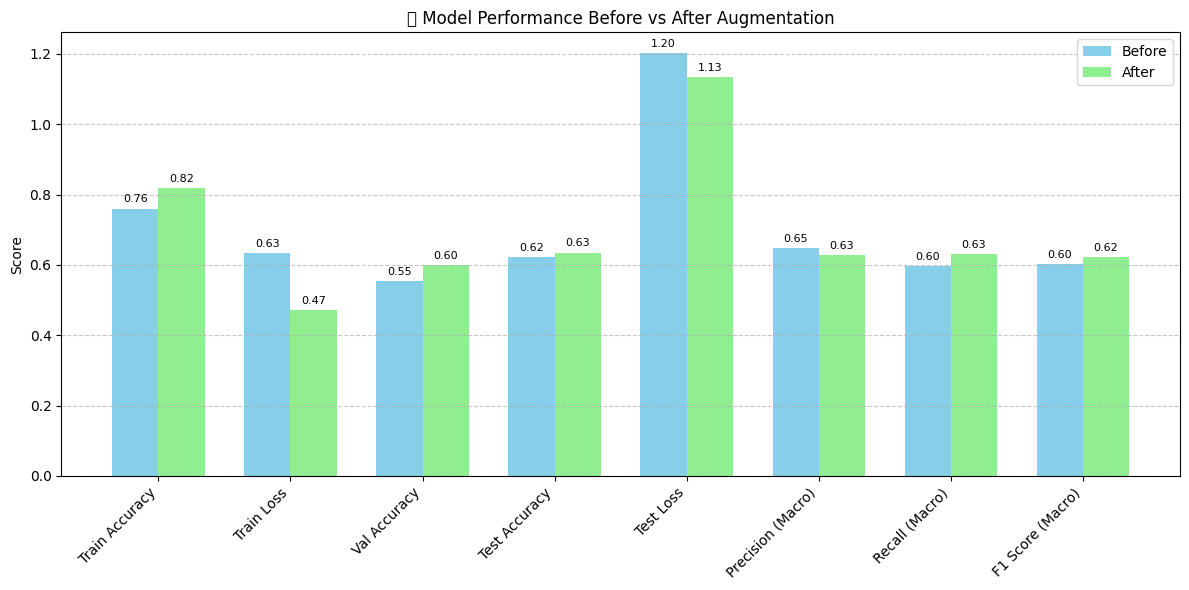

In [ ]:
# Collect all metrics
combined_metrics = {
    "Train Accuracy": (history3.history['accuracy'][-1], history_aug.history['accuracy'][-1]),
    "Train Loss": (history3.history['loss'][-1], history_aug.history['loss'][-1]),
    "Val Accuracy": (val_acc3, val_acc_aug),
    "Test Accuracy": (test_accuracy_before, test_accuracy_after),
    "Test Loss": (test_loss_before, test_loss_after),
    "Precision (Macro)": (report_dict["macro avg"]["precision"], report_dict_after_aug["macro avg"]["precision"]),
    "Recall (Macro)": (report_dict["macro avg"]["recall"], report_dict_after_aug["macro avg"]["recall"]),
    "F1 Score (Macro)": (report_dict["macro avg"]["f1-score"], report_dict_after_aug["macro avg"]["f1-score"])
}

# Create DataFrame for easier plotting
metric_df = pd.DataFrame(combined_metrics, index=["Before Augmentation", "After Augmentation"]).T
metric_df = metric_df.round(4)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metric_df))
width = 0.35

bars1 = ax.bar(x - width/2, metric_df["Before Augmentation"], width, label='Before', color='skyblue')
bars2 = ax.bar(x + width/2, metric_df["After Augmentation"], width, label='After', color='lightgreen')

# Labels and formatting
ax.set_ylabel("Score")
ax.set_title("📊 Model Performance Before vs After Augmentation")
ax.set_xticks(x)
ax.set_xticklabels(metric_df.index, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text slightly above bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

# 1. Business Objective:
The primary goal is to develop an AI-powered waste material classification system that can automatically sort waste into predefined categories. This system aims to:
  - Reduce environmental pollution caused by improper waste disposal.
  - Minimise landfill waste by improving recycling rates.
  - Automate the waste segregation process to reduce manual labour, time, and cost.

# 2. Project Goal:
  - Train a Convolutional Neural Network (CNN) to classify images of waste into 7 distinct categories:
    - Cardboard
    - Glass
    - Metal
    - Paper
    - Plastic
    - Food Waste
    - Other
  - Improve sorting accuracy to support more efficient recycling.

# 3. Data Understanding:
  - The dataset is an image classification dataset structured into seven folders, each representing a specific category of waste.
  - Classes in the dataset:
            Cardboard
            Food_Waste
            Glass
            Metal
            Other
            Paper
            Plastic
  - Each folder contains raw images (7,625 in total) for that waste type.

# 4. Load the Data:
  * The dataset has been uploaded to the google drive and   this command mounts the Google Drive at /content/drive, allow us to access the zipped dataset.
  * Using !unzip command the ZIP file located in the google drive is unzipped to a folder named 'waste_data' inside colab's /content directory.
  * After unzipping, the folder structure will look like,
        /content/waste_data/
        ├── Cardboard/
        ├── Food_Waste/
        ├── Glass/
        ├── Metal/
        ├── Other/
        ├── Paper/
        └── Plastic/

  - Now, the data has been loaded and ready for preprocessing.

# 5. Data Preparation:
## 5.1. Load the Images and Labels
  - A function has been defined to created which converts the dataset from folder-structured format into a usable Python list of images and corresponding labels
  - Keeping images as PIL objects allows flexible preprocessing later (resizing, augmentation, etc.)
  - Iterates through each folder (representing a waste class) inside the dataset directory
  - Reads all image files and assigns their labels based on the folder they belong to

## 5.2. Verify Image and Label counts
  - Basic validation step to ensure the dataset has been loaded correctly
  - Confirmed the number of images matches the number of labels
  - Displayed the unique waste categories to verify folder structure and class diversity
  - Random samples have been displayed

## 5.3. Organizing the Images and Labels in a dataframe
  - Organizing data into a DataFrame which provides a convenient way to perform analysis (e.g., counts, filtering, grouping).
  - Analyzed class distribution to check for class imbalance.
  - Helps identify if certain classes have too few samples (which may require augmentation or rebalancing)
  - Essential for deciding model evaluation strategies (e.g., weighted loss functions or stratified sampling)
      
## 5.4. Resizing the Images
### Purpose to resize the Images
  - Real-world datasets often contain images of varying sizes and aspect ratios
  - Neural networks require fixed-size inputs. This step helps assess how much variation exists and guides for resizing
  - Uniform size simplifies batching and improves training efficiency
  - In this case, the width and Height Range is 256-256

### Resizing steps
  - Resized every image to a fixed size of 224x224 pixels.
  - Converted any image that isn’t already in RGB mode to RGB
  - Ensured all the images have the same number of channels for model compatibility

## 5.5. Encoding the classes
### Purpose to encode the labels
  - Transforming human-readable class names into machine-readable format
  -  Ensuring labels are suitable for use in model training and evaluation

### Steps
  - Used Label Encoder to map class names to numerical values(0,1,2,3,4,5,6)
  - Each class label corresponds to a unique integer
  - Label Encoding is suitable for CNN classification, works with sparse_categorical_crossentropy and less memory usage

# 6. Train-Test Data Split
### 6.1. Split the dataset
  - Splits the entire dataset into:
        80% for training + validation
        20% for testing
  - Keeping aside a test set that the model never sees during training. This is used for final unbiased evaluation
  - Stratify is used which ensures class distribution is preserved across all splits

### 6.2. Created a Data Generator
  - To efficiently load and process the data in batches instead of all at once, which saves memeory
  - Custom Python generator has been generated that yields mini-batches of image data and labels during training
  - Each image is resized and normalized to the [0, 1] range by dividing pixel values by 255
  - The labels are returned as NumPy arrays
  - Prepared the generators for training
  - The generators will be passed to the model

# 7. Model Building

We implemented a solid experimentation strategy by building five different CNN architectures.

## 7.1. Model 1 - 3 Layer Baseline CNN
### Architecture
  - Conv2D(32) → MaxPooling
  - Conv2D(64) → MaxPooling
  - Conv2D(128) → MaxPooling
  - Flatten → Dense(128) → Dropout(0.5) → Dense(7)

### Configuration Summary
  - Basic CNN architecture used as a starting benchmark.
  - Three convolutional layers extract low to high-level features.
  - Dropout helps reduce overfitting.
  - ReLU activations introduce non-linearity.
  - Final softmax layer is suitable for multi-class classification.

### Pros and cons
  - Good for: Baseline performance comparison
  - Limitation: No normalization, prone to overfitting on complex data

## 7.2. Model 2 - 5 Layer CNN with Batch Normalization
### Architecture
  - Two Conv2D(32) + BatchNorm → Conv2D(32) → MaxPooling
  - Two Conv2D(64) + BatchNorm → Conv2D(64) → MaxPooling
  - Conv2D(128) → GlobalAvgPooling
  - Dense(256) → Dropout(0.5) → Dense(7)

### Configuration Summary
  - Batch Normalization after convolutions speeds up training and stabilizes learning
  - GlobalAveragePooling replaces Flatten to reduce overfitting and reduces number of trainable parameters
  - Deeper structure (5 Conv layers) improves feature extraction

### Pros and Cons
  - Good for: More stable and generalizable training
  - Limitation: Slightly more complex

## 7.3. Model 3 - 6 Layer CNN with Progressive Filters
### Architecture
  - Two Conv2D(32) → MaxPooling → BatchNorm
  - Two Conv2D(64) → MaxPooling → BatchNorm
  - Conv2D(128) → MaxPooling
  - Flatten → Dense(512) → Dropout(0.5) → Dense(7)

### Configuration Summary
  - Progressive depth and filter count (32 → 64 → 128) improves hierarchical feature learning
  - Batch Normalization after every pooling improves convergence
  - Dense(512) layer enhances learning capacity before final classification

### Pros and Cons
  - Good for: Balanced performance on moderate datasets
  - Limitation: Slightly risk of overfitting without enough data augmentation

## 7.4. Model 4 - 7 Layer CNN with Separable Convolutions and Global Avg Pool
### Architecture
  - Multiple SeparableConv2D layers (32 → 64 → 128)
  - MaxPooling → GlobalAvgPooling
  - Dense(256) → Dropout(0.5) → Dense(7)

### Configuration Summary
  - SeparableConv2D is efficient alternative to standard Conv2D
  - Fewer parameters helps in faster training
  - Global Average Pooling helps reduce overfitting and
makes model lightweight

### Pros and Cons
  - Good for: Lightweight models with decent performance
  - Might underperform slightly compared to full Conv2D in complex tasks

## 7.5. Model 5 -8-Layer CNN with Progressive Dropout
### Architecture
  - 2× Conv2D(32) + Dropout(0.2)
  - 2× Conv2D(64) + Dropout(0.3)
  - 2× Conv2D(128) + Dropout(0.4)
  - Flatten → Dense(512) → Dropout(0.5) → Dense(7)

### Configuration Summary  
  - Progressive dropout applies higher dropout deeper in the network
  - Prevents overfitting at different abstraction levels
  - Deeper architecture with progressively increasing filters improves expressive power.
  - Heavy dropout regularization allows aggressive learning while controlling overfitting.

### Pros and Cons
  - Good for: High-variance datasets where overfitting is a concern
  - Training might be slower and need more epochs to converge

# 8. Model compilation

  - All five CNN models were compiled using the Adam optimizer with a learning rate of 1e-4
  - The reason for choosing Adam optimizer is it is known for faster convergence and adaptive learning rates, which are well-suited for image classification tasks
  - The loss function used was sparse_categorical_crossentropy, appropriate for multi-class classification with integer-encoded labels
  - The metric used to evaluate performance was accuracy

# 9. Model Complexity Comparison
The parameter counts shows the relative complexity of each model

| **Model** | **Total Parameters** | **Trainable Params** | **Non-Trainable Params** | **Size (Approx.)** |
| --------- | -------------------- | -------------------- | ------------------------ | ------------------ |
| Model 1   | 11,169,863          | 11,169,863           | 0                        | 42.61 MB           |
| Model 2   | 174,631              | 174,439              | 192                      | 682.15 KB          |
| Model 3   | 41,103,911           | 41,103,719           | 192                      | 156.80 MB          |
| Model 4   | 70,018               | 70,018               | 0                        | 273.51 KB          |
| Model 5   | 38,039,847           | 38,039,847           | 0                        | 145.11 MB          |

  - Model 1, with a moderate parameter count (~11M), serves as a balanced baseline
  - Model 2 and Model 4 have significantly fewer parameters making them more lightweight and suitable for faster inference or deployment on edge devices
  - Model 3 and Model 5 are the most complex, with over 38 million parameters each, due to deeper architectures and larger dense layers. These models are capable of learning rich feature representations but may require more memory

# 10. Model Training
## 10.1. Callback setup
During model training, we used callbacks to make the process more efficient and robust

#### EarlyStopping
  - Stops training if the model's performance on the validation set stops improving
  - Prevents overfitting and unnecessary training epochs
  - We used patience=5 which waits for 5 epochs with no improvement in val_loss before stopping

#### ModelCheckpoint
  - Saves the model weights that achieve the best validation accuracy
  - Ensures we retain the most effective version of the model, even if performance declines later
  - We used save_best_only=True ensures only the best model is stored

#### ReduceLROnPlateau
  - Reduces the learning rate if the validation accuracy stalls
  - Helps escape local minima or plateaus during training
  - We applied factor=0.7, patience=4, and min_lr=1e-6 to provide controlled decay

## 10.2. Training function
We encapsulated training logic in a reusable function, train_model() which:
  - Trained each model using consistent steps
  - Monitored training and validation performance
  - Returned key metrics such as best validation accuracy, final training loss, and training time

## 10.3. Training the Model

### Training Results

| **Model**   | **Train Accuracy** | **Best Val Accuracy** | **Best Val Epoch** | **Train Time (mins)** |
| ----------- | ------------------ | --------------------- | ------------------ | --------------------- |
| **Model 3** | 0.7599             | 0.5941                | 11                 | 8.26                  |
| **Model 5** | 0.7781             | 0.5599                | 14                 | 12.41                 |
| **Model 2** | 0.5710             | 0.5579                | 25                 | 9.08                 |
| **Model 1** | 0.6357             | 0.5231                | 10                 | 3.1                  |
| **Model 4** | 0.3185             | 0.3128                | 24                 | 8.41                  |


#### Model 1: Moderate Performance
  - Balanced and serves well as a baseline, but not the best

#### Model 2: Decent Validation, Low Training Accuracy
  - Good validation accuracy (55%) but low training accuracy (57%)
  - the model may be underfitting

#### Model 3: Best Validation Accuracy
  - Highest validation accuracy (59%), indicating the best generalization performance on unseen data
  - Solid training accuracy (75%) without excessive overfitting
  - Reached peak performance in a reasonable number of epochs (15 out of 30)

#### Model 4: Poor Performance
  - Both training and validation accuracy are about 31%
  - The model architecture might be too lightweight or not learning effectively

#### Model 5: Highest Training Accuracy
  - Highest training accuracy (77%) but lower validation accuracy (55%) than Model 3.
  - This suggests possible overfitting — the model learns the training data well but doesn't generalize as effectively

## 10.4. Optimal Model Selection
  - Among the five CNN models evaluated, Model 3 emerged as the best-performing architecture, achieving the highest validation accuracy of 59% and a strong training accuracy of 75%
  - This model demonstrated a good balance between learning capacity and generalization.
  - Model 3's deeper architecture with progressive filters and batch normalization contributed to its success by allowing it to capture complex patterns while maintaining regularization. Based on these results
  - Model 3 was selected as the optimal model for final evaluation


# 11. Model Evaluation on the Test Set

## 11.1. Data Generator for Test Set
  - To efficiently load and process test data in batches instead of all at once, which saves memory
  - To normalize the images and resize them to match the input shape (224x224)
  - This avoids potential memory overflow
  - This generator is finite, making it suitable for one-pass evaluation or prediction

## 11.2. Evaluate on Test Set
  - Load the best weights saved by Model Checkpoint during training
  - Evaluates the model’s final performance using the test set to measure its generalization ability
  - Test Accuracy - 62.23% and Test Loss - 1.2010, indicates good generalization performance, especially for a 7-class image classification problem

## 11.3. Prediction and Metrics

### 11.3.1. Classification Report
  - Make predictions on the test set
  - Generated class-wise metrics- precision, recall, f1-score and support
  - The classification report provided detailed insights into per-class performance, showing that the model performed particularly well on categories like Cardboard, Plastic, and Food Waste

| **Class**       | **Precision** | **Recall** | **F1-Score** | **Support** | **Comment**                                                                                       |
| --------------- | ------------- | ---------- | ------------ | ----------- | ------------------------------------------------------------------------------------------------- |
| **Cardboard**   | 0.76          | 0.80       | 0.78         | 108         | Very good performance — high precision and recall                                                 |
| **Food\_Waste** | 0.56          | 0.74       | 0.64         | 200         | Recall is strong, but precision is lower — some misclassifications                                |
| **Glass**       | 0.49          | 0.55       | 0.52         | 150         | Moderate performance — needs improvement                                                          |
| **Metal**       | 0.80          | 0.49       | 0.61         | 200         | High precision but low recall — model predicts metal correctly but misses many true metal samples |
| **Other**       | 0.68          | 0.33       | 0.44         | 202         | Weak recall — model struggles to identify this class                                              |
| **Paper**       | 0.63          | 0.46       | 0.53         | 206         | Balanced but modest performance                                                                   |
| **Plastic**     | 0.61          | 0.81       | 0.70         | 459         | Strong recall — plastic is detected well, but moderate precision                                  |
           |


### 11.3.2. Overall Metrics

| **Metric**       | **Score**                          | **Comment**                                                             |
| ---------------- | ---------------------------------- | ----------------------------------------------------------------------- |
| **Accuracy**     | 0.6223                             | 62% of total predictions were correct                                   |
| **Macro Avg**    | Prec: 0.65, Recall: 0.60, F1: 0.60 | Averaged per-class (treats all classes equally) — shows overall balance |
| **Weighted Avg** | Prec: 0.64, Recall: 0.62, F1: 0.61 | Accounts for class imbalance — good sign of improvement                 |


#### Insights
  - Plastic and Cardboard are classified well — possibly due to their distinct features and more training samples.
  - Other and Metal have recall issues — model fails to capture all relevant samples.
  - Glass needs more representative examples or better features — poor across all metrics.
  - Macro average is a useful check for fairness — shows that some classes still lag behind.

### 11.3.3. Confusion Matrix
  - Plastic is the most confused class — many predictions end up there, showing over-prediction or bias toward plastic
  - Glass and Metal suffer from major misclassifications — especially glass → plastic
  - Cardboard and Food_Waste show relatively better precision and consistency
  - Other continues to be weak — visually diverse and inconsistent patterns are likely causing this
  - Confusion matrix confirms findings from precision/recall metrics
  - These insights helped guide future improvements, such as using data augmentation

## 11.4. Metrcis Comparison
#### Accuracy Comparison
  - The model achieved a high training accuracy of 75%, the validation accuracy peaked at 57%, and test accuracy reached 59%
  - The test accuracy is higher than validation implies that the model generalizes reasonably well on unseen data
  - This ensures there is no data leakage
  - This confirms that the model captures meaningful patterns while we can perform data augmentation for further refinement

### F1-Score comparison

| Class          | F1-Score | Comment                                                        |
| -------------- | -------- | -------------------------------------------------------------- |
| **Cardboard**  | **0.78** | Strong performance     |
| **Plastic**    | **0.70** | Good performance, Stron recalln |
| **Food Waste** | **0.64** | Moderate performance, decent recall |
| **Metal**      | 0.61     | High Precision but Low Recall         |
| **Paper**      | 0.53    | Mid-level      |
| **Other**      | 0.44    | Weak  |
| **Glass**      | 0.52     | Low recall — often misclassified as plastic or metal.       |

  - Categories like Plastic, Cardboard, and Food Waste achieved relatively high F1-scores, indicating strong precision and recall
  - Categories like Glass, Other, and Paper are underperforming, suggesting misclassifications or overlapping features with other categories
  - This visualization helps identify which classes need more training data, better augmentation, or feature refinement to improve classification performance

# 12. Data Augumentation

## 12.1. Need for Augumentation
  - Data augumentation and resampling helps to prevent bias toward majority classes
  - Helps the model to generalize better to unseen data
  - Reduce overfitting

## 12.2. Steps for Augumentation
The input images will be randomly transformed by the following steps:
  - Slight rotations
  - Shifting left/right or up/down
  - Small zoom in/out
  - Horizontal flipping

## 12.3. Augment and Resample Images
  - Augumentation applied only to the training set, validation and test set remains untouched
  - Built a custom funtion to perform augumentation and resampling
  - This function does two main things
      - Undersamples if a class has more than the target count (e.g., randomly selects 1,000 from 1,500)
      - Oversamples if a class has fewer images (e.g., generates more using augmentation to reach 1,000)
  - Applies augumentation
      - When oversampling, it generates new versions of existing images using the augmentation pipeline
      - Augmented images are converted back to PIL format to stay consistent with the dataset.
  - A new balanced dataset has been created with augumneted images and labels
  - Now, each class has exactly 1000 images with improved diversity and balance

# 13. Retrain the optimal model (Model 3) using the Augumented dataset

## 13.1. Augumented Data Preparation
  - Ensure if the labels in the augumented dataset are encoded
  - The Augumentation was applied only to the training data
  - Validation data and Test data remains untouched to provide an unbiased evaluation during training
  - Shuffle the augumented data before feeding into the data generator to randomize the order of training samples
  - The custom data generator was used to yield batches of augumented data for training and validation data for validation

## 13.2. Model Initialization and Compilation
  - Loaded the best weights from the model3 trained on non-augumented data
  - Compiled using Adam optimizer, sparse categorial crossentropy and accuracy metric

## 13.3. Retrain the optimal model
  - Trained the model on the augumented training data, while validating on the original unaugumneted validation set
  - This ensures validation accuracy reflects performance on "real" unaugumneted data

## 13.4. Training Results Summary

| **Metric**                   | **Before Augmentation** | **After Augmentation** | **Comments**                               |
| ---------------------------- | ----------------------- | ---------------------- | ------------------------------------------ |
| **Training Time**            | 8.26 mins               | 10.66 mins             | Slightly longer due to increased data   |
| **Final Train Accuracy**     | 0.7599                  | 0.8176                 | Improved learning from balanced data     |
| **Best Validation Accuracy** | 0.5941                  | 0.6216                 | Better generalization after augmentation |
| **Best Epoch**               | 15                      | 11                     | Faster convergence with augmented data  |

  - Training accuracy improved because the model was exposed to more diverse and balanced examples.
  - Validation accuracy increased, indicating better generalization to unseen (unaugmented) data.
  - Fewer epochs needed to reach peak validation performance, showing that augmentation helps the model learn faster and more robustly.

# 14. Model Evaluation on the Test Set with the Augumented Model

## 14.1. Data Generator for Test Set
  - To efficiently load and process test data in batches instead of all at once, which saves memory
  - To normalize the images and resize them to match the input shape (224x224)
  - This avoids potential memory overflow
  - This generator is finite, making it suitable for one-pass evaluation or prediction

## 14.2. Evaluate on Test Set
  - Evaluates the augumented model’s final performance using the test set to measure its generalization ability
  - Test Accuracy - 63.48% and Test Loss - 1.1330, indicates good generalization performance, especially for a 7-class image classification problem
  - Augmentation helped the model learn better, especially by addressing class imbalance and adding variation to training data

## 14.3. Prediction and Metrics

### 14.3.1. Classification Report
  - Make predictions on the test set
  - Generated classw-wise metrics- precision, recall, f1-score and support
  - Plastic, Cardboard, and Metal are performing well
  - Other and Glass need better feature separation — possibly due to visual similarity with other classes
  - The model is more balanced overall,

| **Class**       | **Precision** | **Recall** | **F1-Score** | **Support** | **Comments**                                                  |
| --------------- | ------------- | ---------- | ------------ | ----------- | ------------------------------------------------------------- |
| **Cardboard**   | 0.62          | 0.84       | 0.71         | 108         | High recall most true positives found                    |
| **Food_Waste** | 0.65          | 0.66       | 0.65         | 200         | Balanced precision and recall                              |
| **Glass**       | 0.59          | 0.53       | 0.56         | 150         | Needs improvement some misclassifications                |
| **Metal**       | 0.63          | 0.68       | 0.65         | 200         | Performs reliably                                           |
| **Other**       | 0.69          | 0.43       | 0.53         | 202         | High precision but low recall misses many true positives |
| **Paper**       | 0.56          | 0.56       | 0.56         | 206         | Average performance                                         |
| **Plastic**     | 0.67          | 0.72       | 0.69         | 459         | Consistent performer frequent and well-identified         |


### 14.3.2. Overall Metrics

| **Metric**          | **Value** | **Interpretation**                               |
| ------------------- | --------- | ------------------------------------------------ |
| **Accuracy**        | 0.6348    | Overall correct predictions                      |
| **Macro Avg F1**    | 0.62      | Equal weight per class fairness across classes |
| **Weighted Avg F1** | 0.63      | Accounts for class imbalance                     |
               |

### 11.3.3. Confusion Matrix
  - Plastic, Cardboard, Food_waste, and Metal are doing well
  - Glass and Other need improvement, either through data quality, aggressive augmentations

## 11.4. Metrcis Comparison

Compared the important metrics Before and After augumentation

| **Metric**              | **Before Augmentation** | **After Augmentation** | **Change / Impact**                                 |
| ----------------------- | ----------------------- | ---------------------- | --------------------------------------------------- |
| **Train Accuracy**      | 0.76                    | **0.82**               |  Higher training performance                       |
| **Train Loss**          | 0.63                    | **0.47**               |  Lower loss better fit to training data          |
| **Validation Accuracy** | 0.55                    | **0.60**               |  Better generalization                             |
| **Test Accuracy**       | 0.62                    | **0.63**               | Slight more robust to unseen data               |
| **Test Loss**           | 1.20                    | **1.13**               |  Indicates better model confidence                 |
| **Precision (Macro)**   | **0.65**                | 0.63                   |  Slight drop some classes more confused          |
| **Recall (Macro)**      | 0.60                    | **0.63**               |  Model captures more actual positives              |
| **F1 Score (Macro)**    | 0.60                    | **0.62**               | Better overall balance between precision & recall |

## Key Takeaways:
  - Augmentation improved generalization:
      - Validation and test accuracies improved.
      - Training loss decreased significantly, suggesting better learning from more diverse training data.
  - Improved Recall and F1:
      - Indicates the model found more true examples of each class.
      - Especially useful in real-world multi-class problems like waste classification.
  - Slight Drop in Precision:
      - Could be due to augmented data introducing more diverse but slightly noisier samples, leading to misclassifications in edge cases.
  - Overall Improvement:
      - The model became more robust, better at capturing underrepresented classes, and less overfit.
      - The increase in F1 and recall are particularly encouraging, as they indicate more fair and complete classification across all categories.

# Further Improvements
  - Use more diverse, realistic on-the-fly data augmentation to improve generalization
  - Experiment with advanced pre-trained CNN architectures for better accuracy
  - Address class imbalance with techniques like class weighting or focal loss
  - Combine image data with other sensor inputs for improved classification
  - Optimize models for real-time deployment on edge devices in smart bins
  - Implement continuous learning to update the model from real-world feedback

# Conclusion

This project showed that deep learning can help sort different types of waste like cardboard, glass, paper, and plastic more accurately. After using data augmentation, the model got better at recognizing waste correctly, with improved results especially in recall and F1-score. These are important because they show the model is not just doing well on common classes, but also on the harder ones, leading to more fair and complete classification.

The current model reached about 63% accuracy on the test data after improvements. That’s a good start, and it clearly shows that the model is learning to handle a variety of waste better than before. However, there’s still plenty of room to grow.

By adding more realistic data during training, using more powerful pre-trained models, and fixing class imbalances, we can definitely improve the accuracy further. Adding extra sensor data, optimizing the model for real-time use in smart bins, and allowing it to keep learning from real-world examples will also make the system much stronger and more useful in practice.

This CNN already helps make sorting waste faster and more accurate than doing it by hand. With the next set of improvements, it can become an even more reliable tool for improving recycling and keeping the environment clean.









